<a href="https://colab.research.google.com/github/harry418/EmotionRecog/blob/master/training/training_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Imported importanat libraries

In [2]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
import tensorflow
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,AveragePooling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input

# load preprocessed data


In [3]:
# storing preprocessed images and labels for further use
data = np.load('/content/gdrive/My Drive/emotion_recog/data.npy')
labels_value  = np.load('/content/gdrive/My Drive/emotion_recog/labels_value.npy')

# train and test splitting with sklearn


In [4]:
trainX, testX,trainY, testY = train_test_split(data, labels_value,test_size=0.2, random_state=42,shuffle = True)

# Training and plotting accuracy and loss

In [5]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
def summarize_diagnostics(hist):
	plt.plot(hist.history["accuracy"])
	plt.plot(hist.history['val_accuracy'])
	plt.plot(hist.history['loss'])
	plt.plot(hist.history['val_loss'])
	plt.title("model accuracy")
	plt.ylabel("Accuracy")
	plt.xlabel("Epoch")
	plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
	plt.show()

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D

inp = Input(shape = (224,224,3))

model_mobile = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
x1 = model_mobile(inp)
x2 = GlobalAveragePooling2D()(x1)
#x3 = Dense(128,activation='relu')(x2)
out = Dense(6, activation='softmax')(x2)

INIT_LR = 1e-4
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR /100)
model = Model(inputs = inp, outputs = out)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] compiling model...


In [11]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 14,717,766
Non-trainable params: 0
_________________________________________________________________


In [12]:
# batch size and epochs
EPOCHS = 100
BS = 32

In [13]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,zoom_range=0.1)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=BS)
# fit model
steps = int(trainX.shape[0] / BS)
hist = model.fit_generator(it_train, steps_per_epoch=steps, epochs=EPOCHS, validation_data=(testX, testY), verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
53/53 [==============================] - 31s 583ms/step - loss: 1.0902 - accuracy: 0.5414 - val_loss: 0.9855 - val_accuracy: 0.6079
Epoch 2/100
53/53 [==============================] - 28s 524ms/step - loss: 0.8499 - accuracy: 0.6473 - val_loss: 0.9478 - val_accuracy: 0.6079
Epoch 3/100
53/53 [==============================] - 28s 526ms/step - loss: 0.7570 - accuracy: 0.6888 - val_loss: 0.8805 - val_accuracy: 0.6427
Epoch 4/100
53/53 [==============================] - 28s 525ms/step - loss: 0.7363 - accuracy: 0.7053 - val_loss: 0.8058 - val_accuracy: 0.6752
Epoch 5/100
53/53 [==============================] - 28s 528ms/step - loss: 0.6836 - accuracy: 0.7225 - val_loss: 0.8633 - val_accuracy: 0.6682
Epoch 6/100
53/53 [==============================] - 28s 527ms/step - loss: 0.6010 - accuracy: 0.7604 - val_loss: 0.7860 - val_accuracy: 0.6984
Epoch 7/100
53/53 [==============================] - 28s 529

In [14]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

14/14 [==============================] - 2s 120ms/step - loss: 1.7881 - accuracy: 0.8237
> 82.367


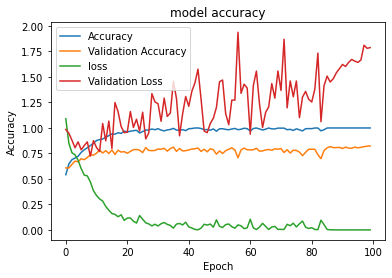

In [15]:
summarize_diagnostics(hist)

# Confusion matrix and classification report

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(testX)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(testY,axis=1)
print(confusion_matrix(y_true,y_p))

[[33  0  0  0  0  0]
 [ 1 71  6  6 14  0]
 [ 0  3 64  6  2  0]
 [ 0  3  7 73  8  0]
 [ 0  6  2 11 41  1]
 [ 0  0  0  0  0 73]]


In [17]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.86      0.72      0.78        98
           2       0.81      0.85      0.83        75
           3       0.76      0.80      0.78        91
           4       0.63      0.67      0.65        61
           5       0.99      1.00      0.99        73

    accuracy                           0.82       431
   macro avg       0.84      0.84      0.84       431
weighted avg       0.83      0.82      0.82       431



# CNN + SVM

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# extracting features using Transfer Learning
model_new = Model(inputs = model.input,outputs = model.get_layer('global_average_pooling2d_3').output) 
train_new = sc.fit_transform(model_new.predict(trainX))
test_new = sc.fit_transform(model_new.predict(testX))

In [22]:

from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(train_new,np.argmax(trainY,axis=1))
sc1 = svm.score(train_new,np.argmax(trainY,axis=1))
sc2 = svm.score(test_new,np.argmax(testY,axis=1))
print('training accuracy of svm is : ',sc1)
print('testing accuracy of svm is : ',sc2)

training accuracy of svm is :  1.0
testing accuracy of svm is :  0.8120649651972158


# CNN + XGBOOST


In [23]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(train_new,np.argmax(trainY,axis=1))
sc3 = xg.score(train_new,np.argmax(trainY,axis=1))
sc4 = xg.score(test_new,np.argmax(testY,axis=1))
print('training accuracy of xgboost is : ',sc3)
print('testing accuracy of xgboost is : ',sc4)

training accuracy of xgboost is :  1.0
testing accuracy of xgboost is :  0.7958236658932715
